In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.utils import to_categorical
import tensorflow as tf


In [3]:

# a. Loading and preprocessing the image data
(X_train, y_train), (X_test, y_test) = mnist.load_data()  # Load MNIST dataset
X_train = np.expand_dims(X_train, axis=-1)  # Add channel dimension (28x28x1)
X_test = np.expand_dims(X_test, axis=-1)    # Add channel dimension (28x28x1)
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values to [0, 1]
y_train = to_categorical(y_train, num_classes=10)  # One-hot encode labels
y_test = to_categorical(y_test, num_classes=10)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# b. Defining the model’s architecture
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer
    Flatten(),  # Flatten the input for the dense layer
    Dense(128, activation='relu'),   # Hidden layer with ReLU activation
    Dropout(0.5),                    # Dropout layer for regularization
    Dense(10, activation='softmax')  # Output layer with softmax activation for 10 classes
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# c. Training the model
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])  # Compile the model

history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2)  # Train the model



Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.6643 - loss: 1.0995 - val_accuracy: 0.9283 - val_loss: 0.2549
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.8953 - loss: 0.3543 - val_accuracy: 0.9431 - val_loss: 0.1978
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9147 - loss: 0.2882 - val_accuracy: 0.9513 - val_loss: 0.1658


In [6]:
# d. Estimating the model’s performance
test_loss, test_accuracy = model.evaluate(X_test, y_test)  # Evaluate on test set
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')  # Print results


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9443 - loss: 0.1873
Test Loss: 0.1634, Test Accuracy: 0.9517


In [7]:

# Making predictions on test images
predictions = model.predict(X_test)  # Get predictions for test set
predicted_classes = np.argmax(predictions, axis=1)  # Get predicted class labels


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


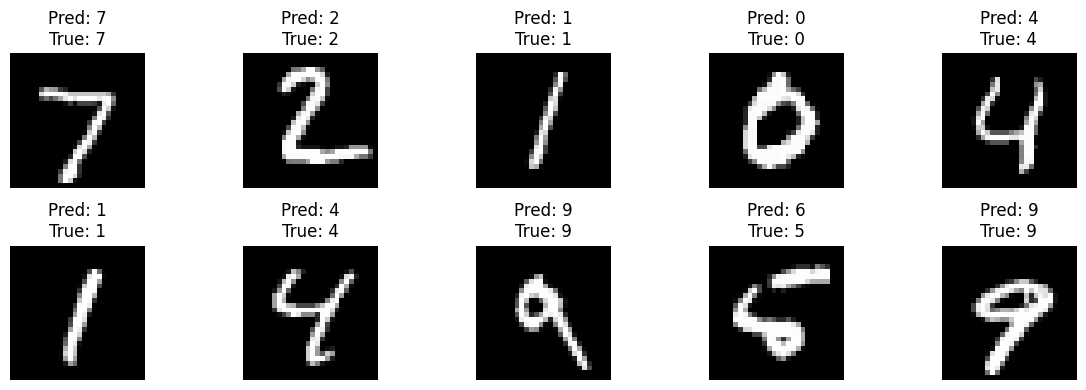

In [8]:

# Visualizing some predictions along with actual labels
num_images_to_display = 10
plt.figure(figsize=(12, 4))
for i in range(num_images_to_display):
    plt.subplot(2, num_images_to_display//2, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Display image
    plt.title(f'Pred: {predicted_classes[i]}\nTrue: {np.argmax(y_test[i])}')  # Show predicted and true labels
    plt.axis('off')

plt.tight_layout()
plt.show()



In [9]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 4))



<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

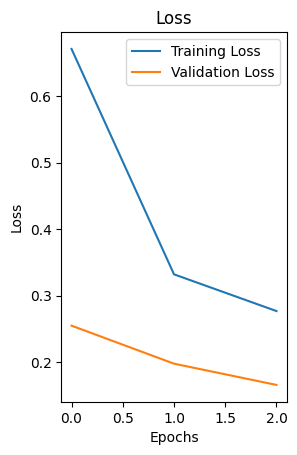

In [10]:
# Plotting Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


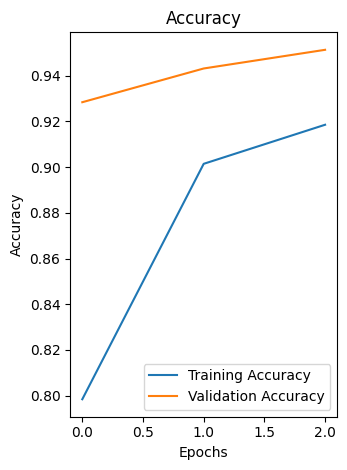

In [11]:

# Plotting Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()